In [ ]:
!wget -O bricks.jpg https://idtxs3.imgix.net/si/40000/6F/BE.jpg
!wget https://github.com/Naxalov/ComputerVision/raw/master/OpenCV/Line.png
!wget https://github.com/Naxalov/ComputerVision/raw/master/OpenCV/dashes.png
!wget https://github.com/Naxalov/ComputerVision/raw/master/OpenCV/degree20.png

--2021-06-09 13:27:27--  https://idtxs3.imgix.net/si/40000/6F/BE.jpg
Resolving idtxs3.imgix.net (idtxs3.imgix.net)... 151.101.78.208, 2a04:4e42:12::720
Connecting to idtxs3.imgix.net (idtxs3.imgix.net)|151.101.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 367300 (359K) [image/jpeg]
Saving to: ‘bricks.jpg’

bricks.jpg          100%[===================>] 358.69K  --.-KB/s    in 0.04s   

2021-06-09 13:27:27 (8.07 MB/s) - ‘bricks.jpg’ saved [367300/367300]

--2021-06-09 13:27:27--  https://github.com/Naxalov/ComputerVision/raw/master/OpenCV/Line.png
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Naxalov/ComputerVision/master/OpenCV/Line.png [following]
--2021-06-09 13:27:28--  https://raw.githubusercontent.com/Naxalov/ComputerVision/master/OpenCV/Line.png
Resolving raw.githubusercontent.com

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json
from random import randint
from skimage.morphology import skeletonize


# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
# plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [ ]:
# utility 
def show(img,s=8,b=False):
  plt.figure(figsize=(s,s))
  plt.imshow(img,cmap='gray')
  plt.grid(alpha=.2)
  plt.grid(b)
  plt.show()

In [ ]:
def get_img(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  return img,gray

In [ ]:
img_rgb,img_gray= get_img('bricks.jpg')
line_rgb,line_gray= get_img('Line.png')
dashes_rgb,dashes_gray= get_img('dashes.png')
degree_rgb,degree_gray= get_img('degree20.png')


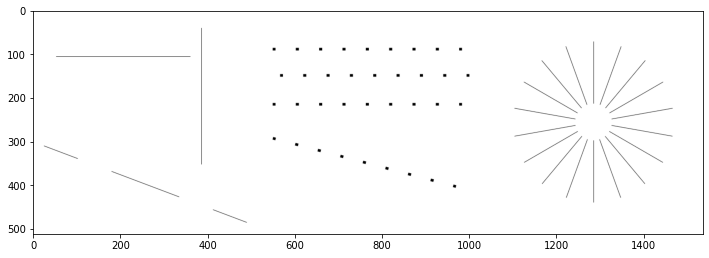

In [ ]:
show(np.hstack((line_rgb, dashes_rgb, degree_rgb)), s=12)

[link text](https:// [link text](https://))#BRICKS

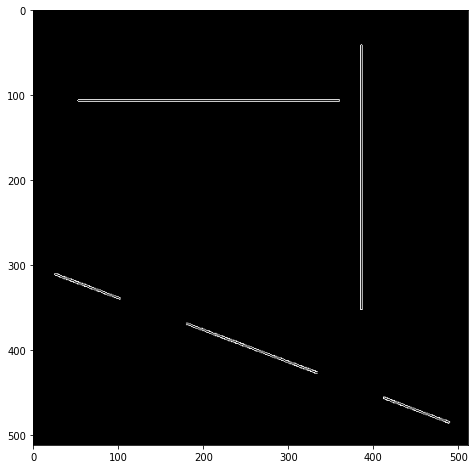

In [ ]:
line_copy = line_gray.copy()

edge_line = cv2.Canny(line_copy, 200, 800)
show(edge_line)

In [ ]:
linesP = cv2.HoughLinesP( edge_line, rho=1, theta = np.pi / 720, threshold=8, minLineLength=70, maxLineGap=50)
print(len(linesP))
print(linesP.shape)
print(linesP)
print(linesP[-1])
print(linesP[-1][0])
print(linesP[-1][0][0])

13
(13, 1, 4)
[[[385 352 385  41]]

 [[181 368 334 425]]

 [[387 352 387  41]]

 [[ 53 105 360 105]]

 [[ 29 310 102 339]]

 [[ 53 107 360 107]]

 [[180 370 332 427]]

 [[412 457 490 485]]

 [[180 368 333 425]]

 [[ 25 310  98 339]]

 [[414 455 486 483]]

 [[ 26 310 102 340]]

 [[416 459 489 486]]]
[[416 459 489 486]]
[416 459 489 486]
416


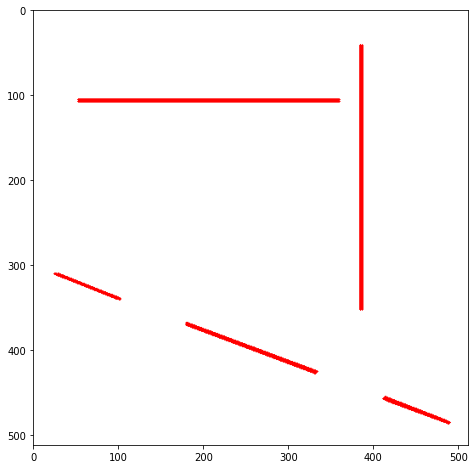

In [ ]:
img_line = np.full(line_rgb.shape, fill_value=[255], dtype=np.uint8)

for pt in linesP:
  img_line = cv2.line(img_line, (pt[0,0],pt[0,1]), (pt[0,2],  pt[0,3]), (255,0,0), 2)
show(img_line)

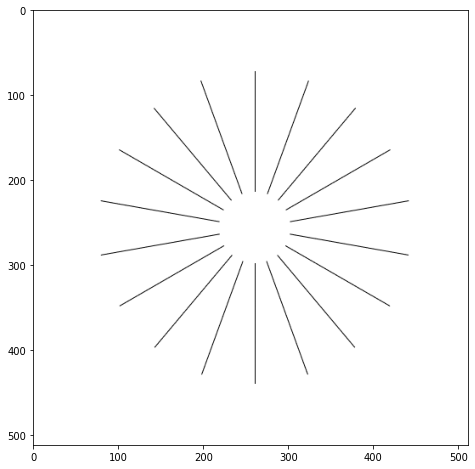

In [ ]:
show(degree_rgb)

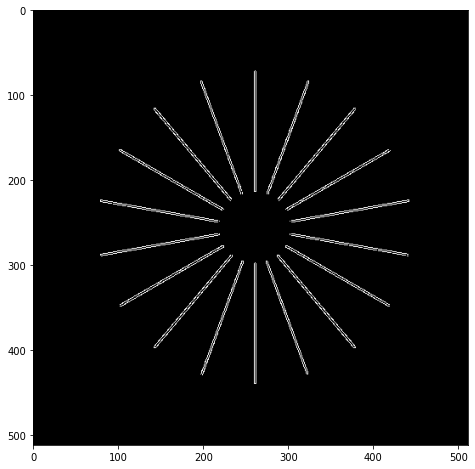

In [ ]:
degree_copy = degree_gray.copy()

degree_copy = cv2.Canny(degree_copy,50, 200 )

show(degree_copy)

In [ ]:
lines_degree = cv2.HoughLinesP(degree_copy, 1, theta=np.pi/360, threshold=10, minLineLength=20, maxLineGap=10 )

print(len(lines_degree))

68


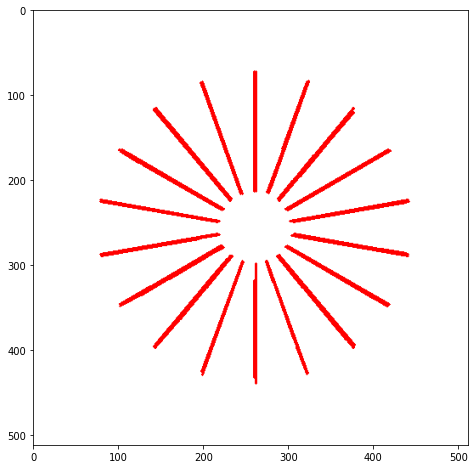

In [ ]:
degree_line_detect = np.full(degree_rgb.shape, fill_value=[255], dtype=np.uint8)

for line in lines_degree:
  x1, y1, x2, y2 = line[0]

  degree_line_detect = cv2.line(degree_line_detect, (x1, y1), (x2, y2), (255,0,0), 2)
show(degree_line_detect)

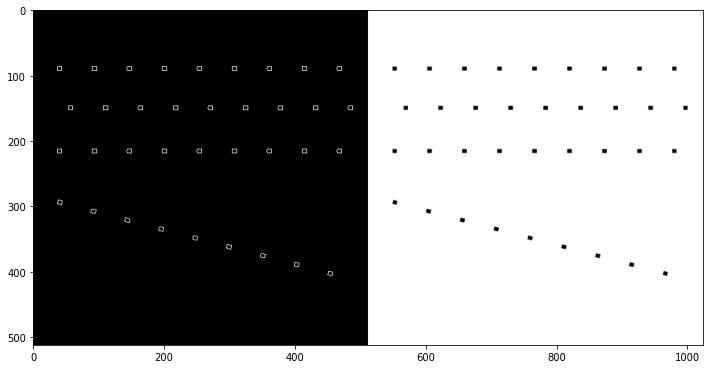

In [ ]:
dashes = dashes_gray.copy()

dashes = cv2.Canny(dashes, 200, 500)

show(np.hstack((dashes, dashes_gray)), s=12)

In [ ]:
lines_dashes = cv2.HoughLinesP(dashes, 1, theta=np.pi/360, threshold=10, minLineLength=25, maxLineGap=110)

print(len(lines_dashes))


27


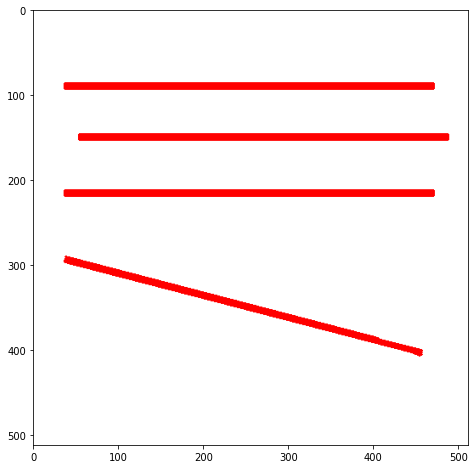

37 295


In [ ]:
dashes_copy = np.full(dashes_rgb.shape, 255,  np.uint8)

for coords in lines_dashes:
  x1, y1, x2, y2 = coords[0]
  dashes_copr = cv2.line(dashes_copy, (x1, y1), (x2, y2), (255,0,0), 2)

show(dashes_copy)
print(x1, y1)

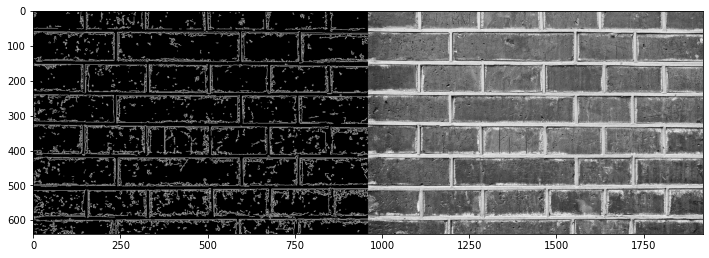

In [ ]:
img = img_gray.copy()
# img = cv2.blur(img, (2,2))
img = cv2.Canny(img, 200, 500)

show(np.hstack((img, img_gray)), s=12)

322


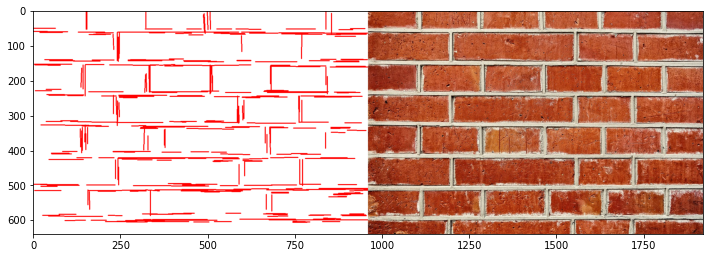

In [ ]:
lines_img = cv2.HoughLinesP(img, rho=1, theta=np.pi/720, threshold=50, minLineLength=40, maxLineGap=6)

print(len(lines_img))

img_copy = np.full(img_rgb.shape, 255,  np.uint8)

for points in lines_img:
  x1, y1, x2, y2 = points[0]
  dashes_copr = cv2.line(img_copy, (x1, y1), (x2, y2), (255,0,0), 2)

show(np.hstack((img_copy, img_rgb)), s=12)

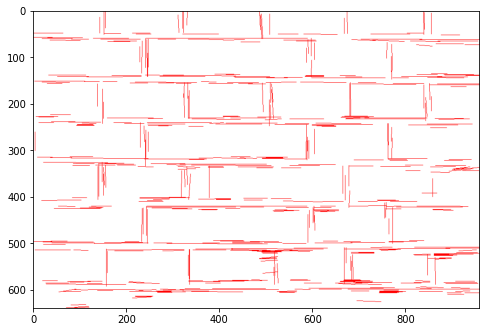

In [ ]:
img_copy = np.full(img_rgb.shape, 255,  np.uint8)

for points in lines_img:
  x1, y1, x2, y2 = points[0]
  dashes_copr = cv2.line(img_copy, (x1, y1), (x2, y2), (255,0,0), 1)

show(img_copy)